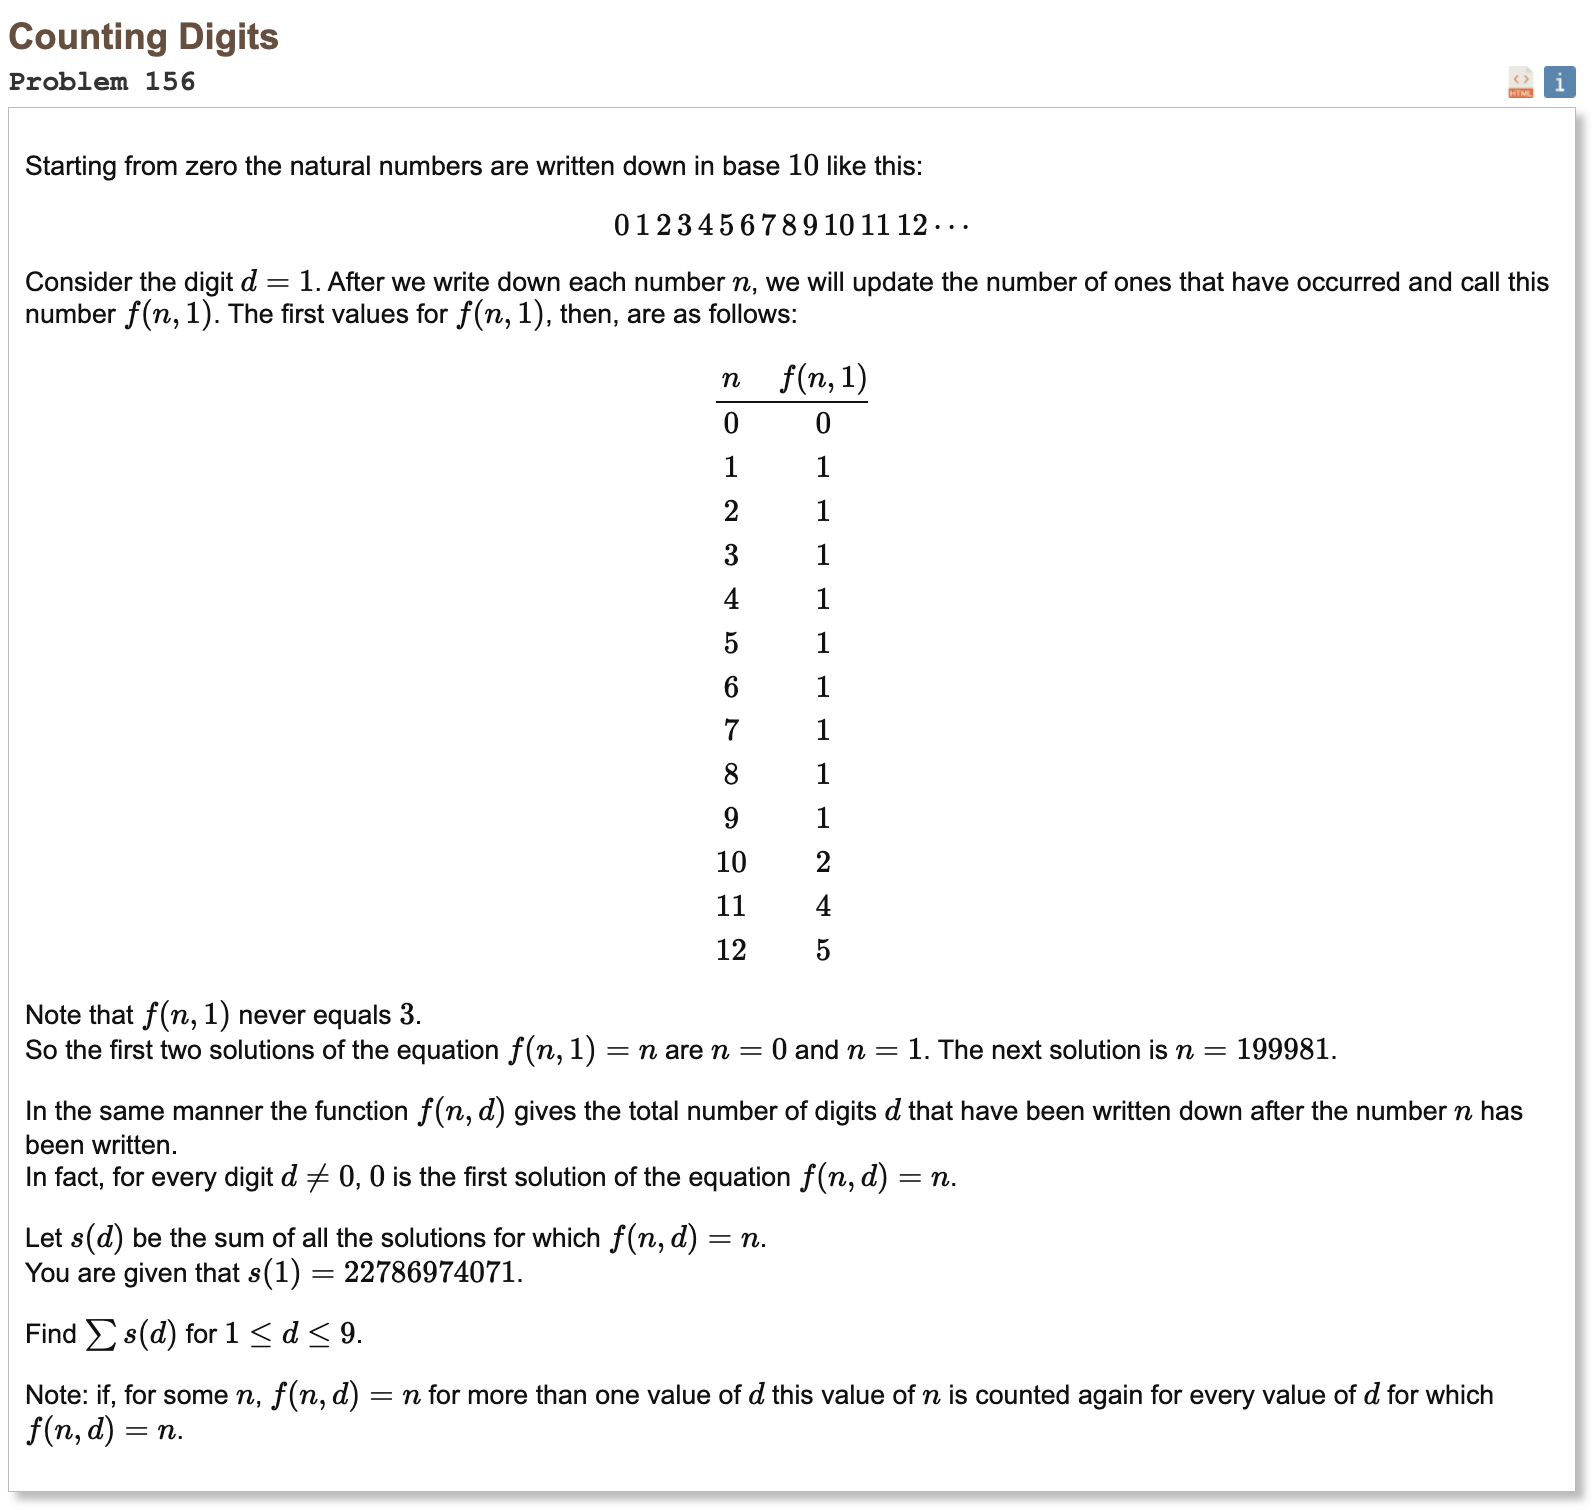

## Initial approach

* write a fast function f(n,d) to count how many times digit d appears from 0 to n
* use the classic per-position formula so counting runs in about log10(n) time
* solve the fixed-point equation f(n,d) = n for each d in 1..9
* do this by fixed-point iteration: start from many seed values x and repeatedly set x ← f(x,d) until it settles
* if it settles at a value where f(x,d) equals x, that x is a valid solution and we record it
* sweep seeds across powers of ten and small multiples so we don’t miss different attraction basins
* sum every solution n for each digit d and finally add across all digits to get the total
* no external libraries beyond math are used

In [1]:
%%time
import math

def count_digit_upto(n, d):
    if n < 0:
        return 0
    total = 0
    factor = 1
    while factor <= n:
        lower = n % factor
        cur = (n // factor) % 10
        higher = n // (factor * 10)
        if d != 0:
            total += higher * factor
        else:
            if higher > 0:
                total += (higher - 1) * factor
        if cur > d:
            total += factor
        elif cur == d:
            total += lower + 1
        factor *= 10
    return total

def fixed_point_solutions_for_digit(d, max_n):
    sols = set()
    seeds = set()
    for m in range(0, 13):
        p = 10**m
        for k in range(1, 10):
            x = k * p
            if x <= max_n:
                seeds.add(x)
        if p <= max_n:
            seeds.add(p - 1 if p > 0 else 0)
            seeds.add(min(max_n, p + p // 2))
    seeds.add(1)
    seeds.add(max_n)
    for s in sorted(seeds):
        x = s
        seen = set()
        for _ in range(200):
            y = count_digit_upto(x, d)
            if y == x:
                sols.add(x)
                break
            if y in seen:
                break
            seen.add(y)
            x = y
    sols2 = set()
    for x in sols:
        if 0 <= x <= max_n and count_digit_upto(x, d) == x:
            sols2.add(x)
    return sorted(sols2)

def main():
    max_n = 10**12
    total = 0
    all_solutions = []
    for d in range(1, 10):
        sols = fixed_point_solutions_for_digit(d, max_n)
        all_solutions.extend(sols)
        total += sum(sols)
    result = total
    print("Result:", result)

if __name__ == "__main__":
    main()

Result: 1231611000005
CPU times: user 831 ms, sys: 7.51 ms, total: 838 ms
Wall time: 838 ms
